In [18]:
# data organization libraries
import numpy as np
import pandas as pd

# data visualization libraries
import plotly.express as px
import matplotlib.pyplot as plt

# modeling libraries
import sklearn as sk


In [19]:
# get raw data

fire_df = pd.read_csv('clean_fires.csv')

fire_df.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [20]:
len(fire_df)

512

In [21]:
mons = fire_df['month'].value_counts()

In [22]:
mons.head()



8    184
9    172
3     54
7     32
2     20
Name: month, dtype: int64

In [23]:
aug_fires = fire_df[fire_df['month'] == 8]

aug_fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
5,8,6,8,0,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
12,6,5,8,5,63.5,70.8,665.3,0.8,17.0,72,6.7,0.0,0.0
23,7,4,8,6,90.2,110.9,537.4,6.2,19.5,43,5.8,0.0,0.0


In [24]:
len(aug_fires)

184

In [25]:
samp = aug_fires.sample(n=60)

samp.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
99,3,4,8,0,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.0
51,4,3,8,0,90.2,99.6,631.2,6.3,21.5,34,2.2,0.0,0.0
400,8,6,8,4,90.7,194.1,643.0,6.8,21.3,41,3.6,0.0,0.0
487,4,4,8,4,95.8,152.0,624.1,13.8,32.4,21,4.5,0.0,0.0
266,2,2,8,2,92.1,152.6,658.2,14.3,23.7,24,3.1,0.0,0.0


In [26]:
len(samp)

60

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

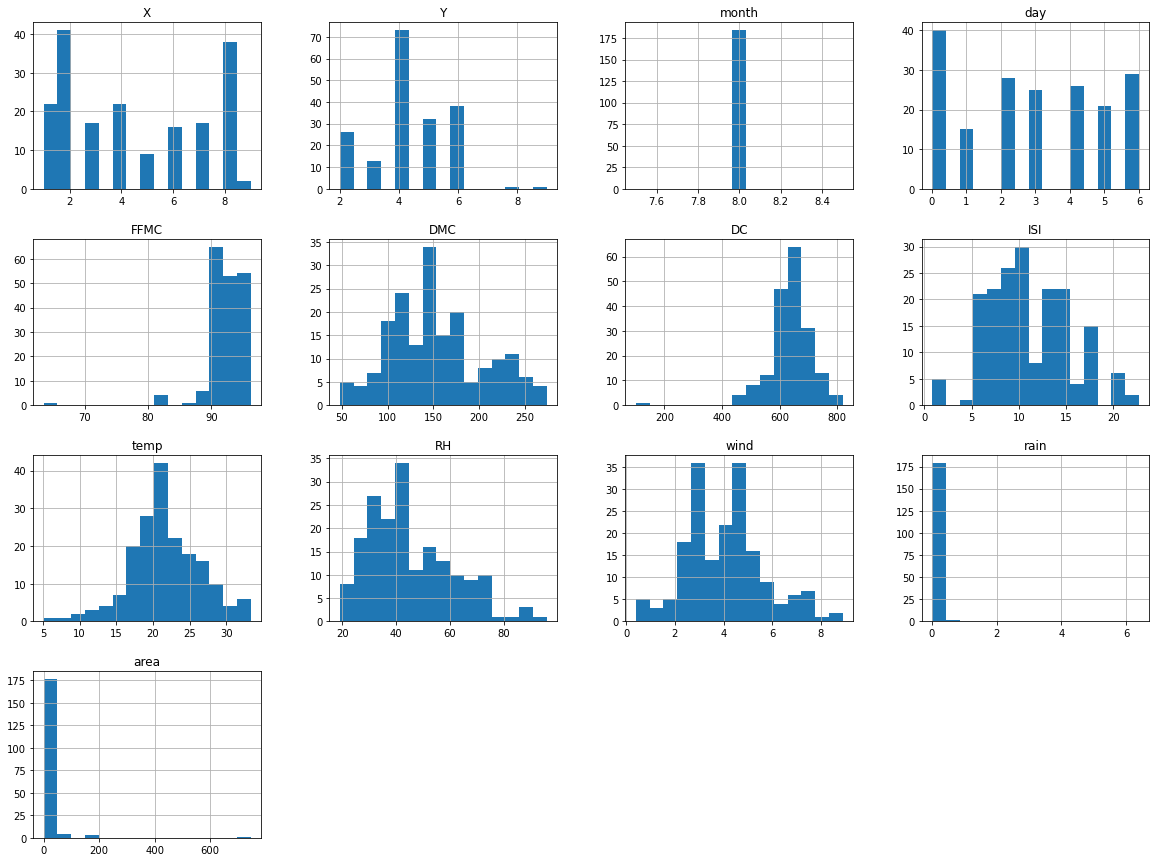

In [27]:
aug_fires.hist(bins=15, figsize=(20,15))

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

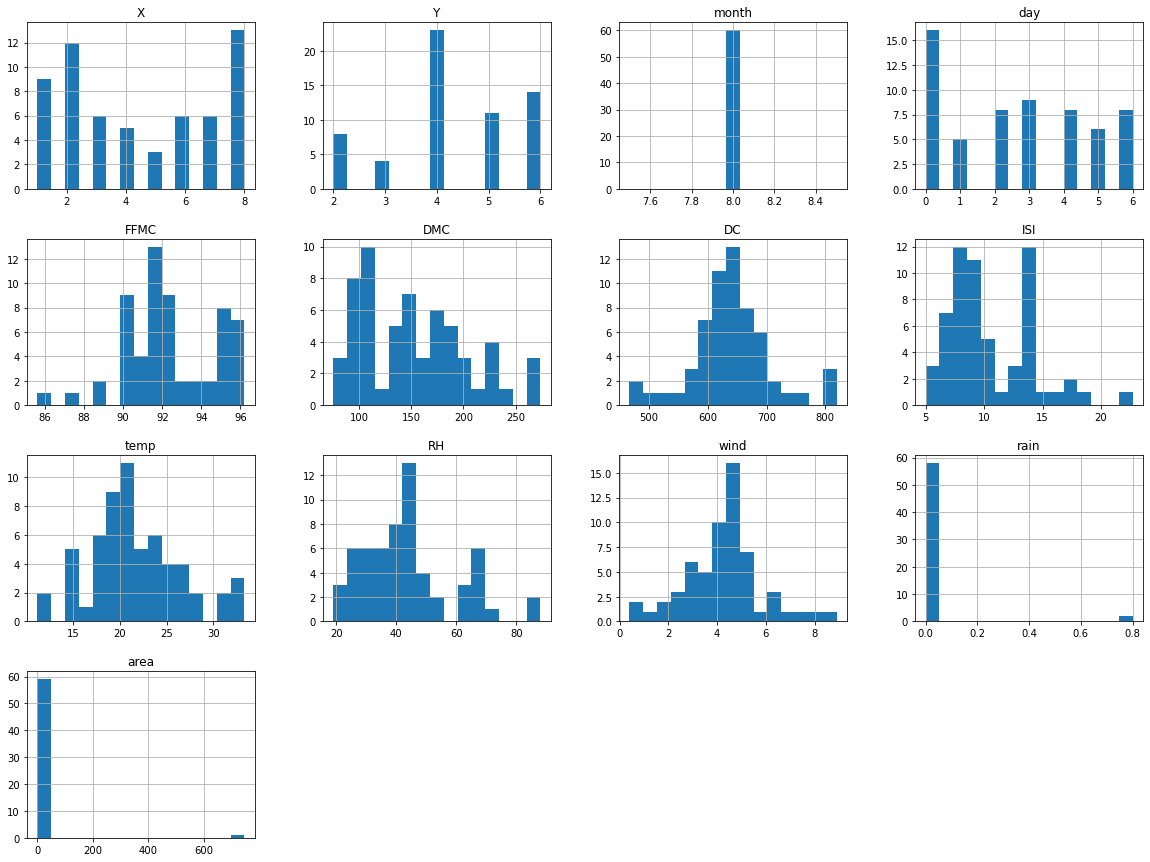

In [28]:
samp.hist(bins=15, figsize=(20,15))

In [29]:
mon_index =[8, 9, 3, 7, 2, 6, 10, 12, 4]

sample_list = [61, 57, 18, 11, 7, 6, 5, 3, 3]

In [30]:
def generate_month_sample(df, month, num_samples, rand_s):
    
    month_df = df[df['month'] == month]
    
    return month_df.sample(n=num_samples, random_state=rand_s)


In [31]:
def generate_year_sample(df, num_sample_list, index_list, rs):
    
    final_df = pd.DataFrame()
    
    dex = range(len(index_list))
    
    
    
    for i in dex:
        
        if i == 0:
            
            final_df = generate_month_sample(df, index_list[i], num_sample_list[i], rs)
        else:
            
            final_df = pd.concat([final_df, generate_month_sample(df, index_list[i], num_sample_list[i], rs)])
    
    return final_df
        
        

In [33]:
one_yr = generate_year_sample(fire_df, sample_list, mon_index, 1)

one_yr.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
65,2,2,8,4,91.7,114.3,661.3,6.3,18.6,44,4.5,0.0,0.00
454,1,4,8,3,91.7,191.4,635.9,7.8,19.9,50,4.0,0.0,82.75
268,4,4,8,2,92.1,152.6,658.2,14.3,19.1,53,2.7,0.0,4.40
486,4,4,8,3,95.1,141.3,605.8,17.7,28.7,33,4.0,0.0,0.00
160,6,4,8,4,95.2,131.7,578.8,10.4,20.3,41,4.0,0.0,1.90


In [34]:
len(one_yr)

171

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

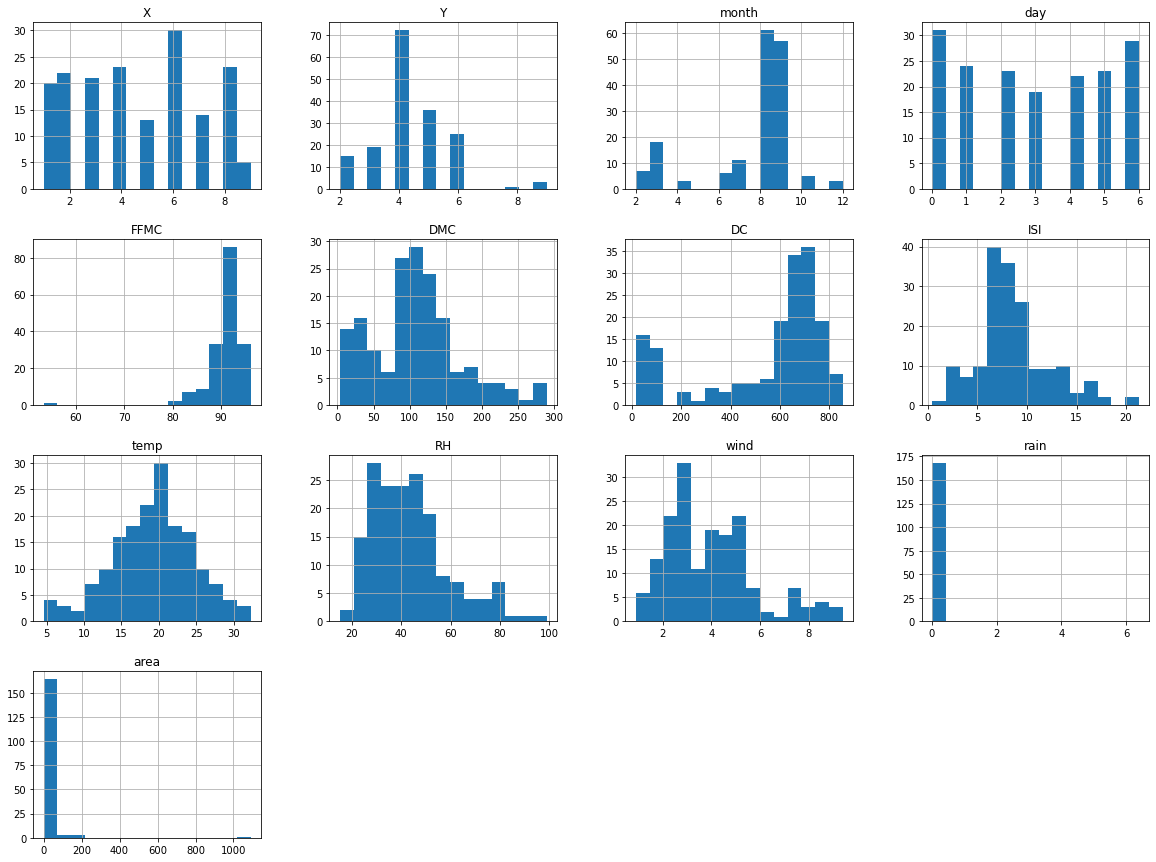

In [35]:
one_yr.hist(bins=15, figsize=(20,15))

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

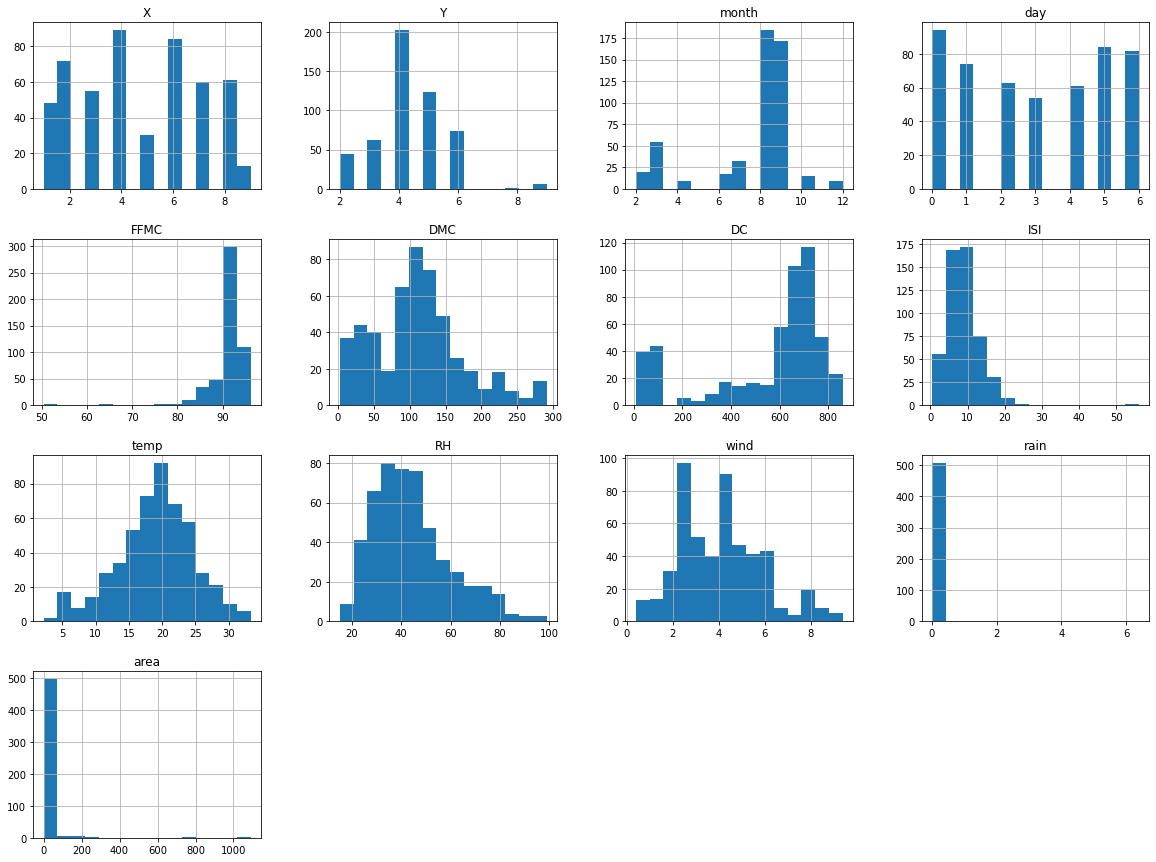

In [36]:
fire_df.hist(bins=15, figsize=(20,15))

In [37]:
# now that we have our sampling function, lets start to create our final: train, validation, 
# and test sets. The data will be sampled in such a way that students models will be more
# accurate on the validation sets, which will be samples of the final test set, if they select
# the best features from the train set.


In [38]:
# final data sets v1

In [39]:
# gen train
# description: fictional yearly data from 2000-2016
# 1. 2720 rows (680 * 4)
# 2. strait rand samp (prob)
# 3. students will discover true model through EDA and validation
# 4. Main Idea, if a student trains their model on data that is more similar to final test set
# then they will have a higher accuracy on their kaggle submission, and use test/val/train to 
# earn their grade.

In [40]:
rand_states = dict.fromkeys([1, 2, 3], 10)

rand_states

{1: 10, 2: 10, 3: 10}

In [41]:
myDict = {
  **dict.fromkeys([1, 2, 3, 4], 1), 
  **dict.fromkeys([5, 6, 7, 8], 2),
  **dict.fromkeys([9, 10, 11, 12], 3),
  **dict.fromkeys([13, 14, 15, 16], 4),
}

myDict

{1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 2,
 6: 2,
 7: 2,
 8: 2,
 9: 3,
 10: 3,
 11: 3,
 12: 3,
 13: 4,
 14: 4,
 15: 4,
 16: 4}

In [42]:
myDict[9]

3

In [43]:
#def add_yr_label(df, label)

In [44]:
def gen_train_data(df, sam_nums, dex, rand_state):
    
    train = pd.DataFrame()
    
    yrs = 16
    
    while yrs > 0:
        
        state = rand_state[yrs]
        
        curr_yr = generate_year_sample(df, sam_nums, dex, state)
        
        train = pd.concat([train, curr_yr])
        
        yrs-=1
    
    return train
    
    
    

In [45]:
train_df = gen_train_data(fire_df, sample_list, mon_index, myDict)

train_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
504,1,2,8,5,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00
483,5,4,8,2,95.1,141.3,605.8,17.7,26.4,34,3.6,0.0,16.40
165,6,5,8,3,92.1,111.2,654.1,9.6,16.6,47,0.9,0.0,2.29
253,6,3,8,4,91.6,138.1,621.7,6.3,18.9,41,3.1,0.0,10.34
106,4,5,8,0,90.2,99.6,631.2,6.3,21.4,33,3.1,0.0,0.00


In [46]:
len(train_df)

2736

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

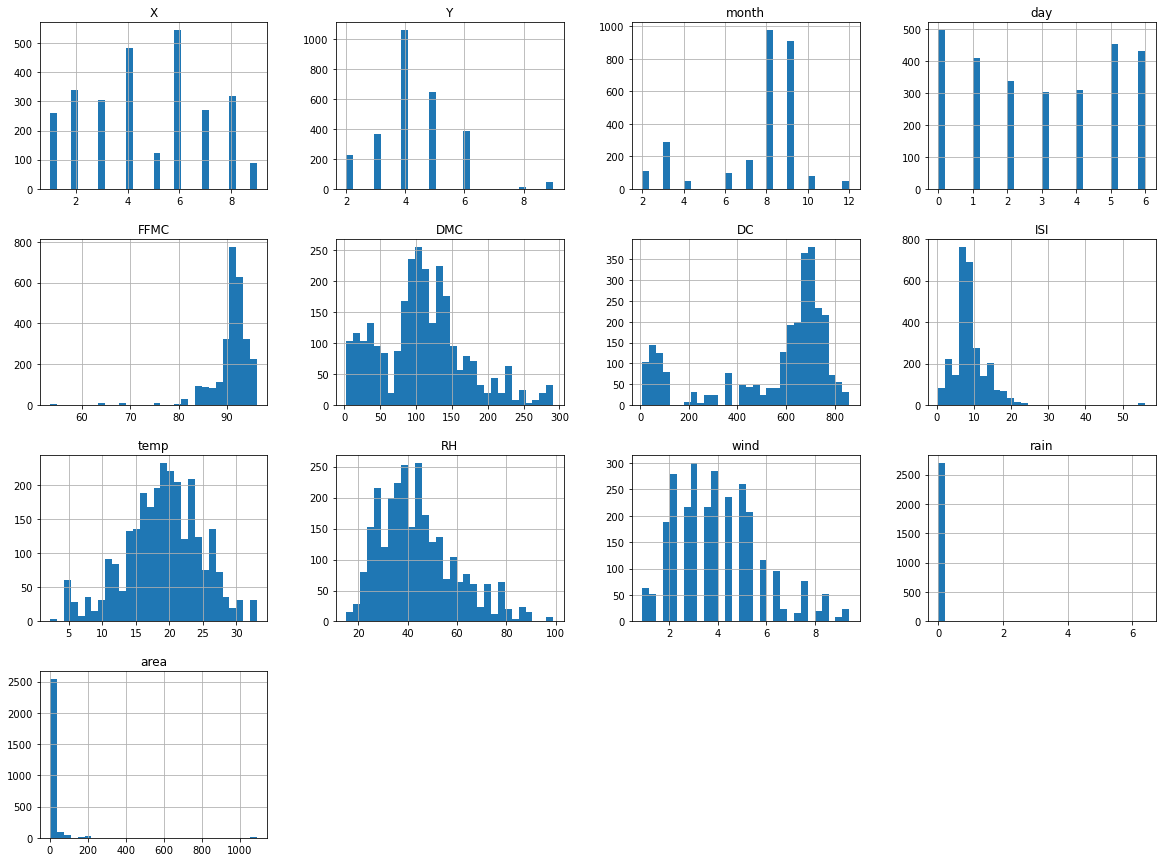

In [47]:
train_df.hist(bins=30, figsize=(20,15))

In [48]:
# lets conduct some EDA on train_df

train_df.describe()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,4.725146,4.317251,7.485380,2.951754,90.844737,109.474708,547.626901,8.989912,19.050292,43.934211,4.018860,0.037719,14.842632
std,2.313090,1.277656,2.249145,2.131820,4.307169,61.287021,246.565782,4.742705,5.694767,15.644872,1.773511,0.434065,77.433124
min,1.000000,2.000000,2.000000,0.000000,53.400000,2.400000,7.900000,0.400000,2.200000,15.000000,0.900000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,1.000000,90.200000,73.350000,442.100000,6.400000,15.600000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,3.000000,91.700000,108.000000,661.300000,8.400000,19.400000,42.000000,4.000000,0.000000,0.645000
75%,6.000000,5.000000,9.000000,5.000000,92.900000,141.300000,713.225000,10.450000,22.900000,53.000000,4.900000,0.000000,6.380000
max,9.000000,9.000000,12.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.100000,99.000000,9.400000,6.400000,1090.840000


(array([2284.,  152.,  100.,   36.,   32.,   12.,   12.,   16.,    8.,
          20.,    0.,    0.,    0.,    0.,    8.,    0.,   12.,   12.,
          12.,    4.,    0.,    0.,    0.,    0.,    0.,    4.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          12.]),
 array([   0.    ,   10.9084,   21.8168,   32.7252,   43.6336,   54.542 ,
          65.4504,   76.3588,   87.2672,   98.1756,  109.084 ,  119.9924,
         130.9008,  141.8092,  152.7176,  163.626 ,  1

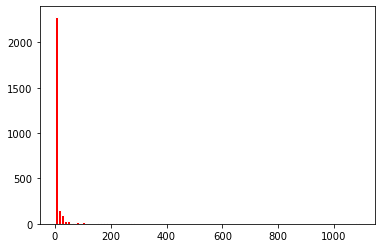

In [49]:
plt.hist(train_df['area'], ec= 'w', bins=100, color='red')

In [51]:
# group burnt area
train_df['area_cat'] = pd.cut(train_df['area'], bins=[0,5, 10, 50, 100, 1100], include_lowest=True, 
                                 labels=['0-5', '5-10', '10-50', '50-100', '>100'])
train_df['area_cat'].value_counts()

0-5       1984
10-50      340
5-10       272
>100        84
50-100      56
Name: area_cat, dtype: int64

In [52]:
# remove outliers, i.e. any area greater than 100

train_df.drop(train_df[train_df['area'] > 100].index, axis=0,inplace=True)

train_df['area_cat'].value_counts()

0-5       1984
10-50      340
5-10       272
50-100      56
>100         0
Name: area_cat, dtype: int64

(array([  4.,   0.,   0.,  36.,  24.,  28.,   0.,   8.,   4.,  32.,  16.,
          0.,  16.,  36.,  72.,  48.,  60.,  16.,  72.,  64.,  44., 140.,
        104.,  92., 112., 136.,  60., 144., 112., 164., 132., 100.,  60.,
        108., 116.,  80.,  56.,  36.,  56.,  72.,  32.,  44.,  20.,  24.,
          8.,  16.,  16.,   0.,  20.,  12.]),
 array([ 2.2  ,  2.818,  3.436,  4.054,  4.672,  5.29 ,  5.908,  6.526,
         7.144,  7.762,  8.38 ,  8.998,  9.616, 10.234, 10.852, 11.47 ,
        12.088, 12.706, 13.324, 13.942, 14.56 , 15.178, 15.796, 16.414,
        17.032, 17.65 , 18.268, 18.886, 19.504, 20.122, 20.74 , 21.358,
        21.976, 22.594, 23.212, 23.83 , 24.448, 25.066, 25.684, 26.302,
        26.92 , 27.538, 28.156, 28.774, 29.392, 30.01 , 30.628, 31.246,
        31.864, 32.482, 33.1  ]),
 <BarContainer object of 50 artists>)

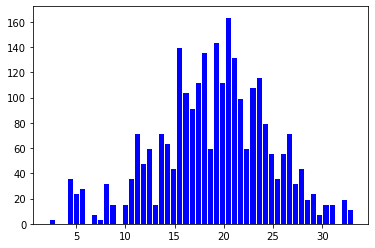

In [53]:
# lets check out temp

plt.hist(train_df['temp'], ec='w', bins=50, color='blue')

In [54]:
# group by temp
train_df['temp_bins'] = pd.cut(train_df['temp'], bins=[0, 15, 20, 25, 40], include_lowest=True, 
                                 labels=['0-15', '15-20', '20-25', '>25'])

train_df['temp_bins'].value_counts()



15-20    884
20-25    840
0-15     572
>25      356
Name: temp_bins, dtype: int64

# Validation Flow

![](cross_val.png)

Diagram taken from [sklearns model selection and evaluation](https://scikit-learn.org/stable/modules/cross_validation.html) documentation

In [55]:
train_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_cat,temp_bins
504,1,2,8,5,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,0-5,>25
483,5,4,8,2,95.1,141.3,605.8,17.7,26.4,34,3.6,0.0,16.40,10-50,>25
165,6,5,8,3,92.1,111.2,654.1,9.6,16.6,47,0.9,0.0,2.29,0-5,15-20
253,6,3,8,4,91.6,138.1,621.7,6.3,18.9,41,3.1,0.0,10.34,10-50,15-20
106,4,5,8,0,90.2,99.6,631.2,6.3,21.4,33,3.1,0.0,0.00,0-5,20-25


In [56]:
# export train data to model notebook

train_df.to_csv('raw_df.csv', index=False)

In [ ]:
# lets do a simple test train split using sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# gen train v2
# changes: 1. add year label
#          2. as years go on, increase mean of area
#          3. total num of fires per month variance
#             between top 3 months and rest increase
#          4. increase sampling bias from middle of
#             area distribution
#          5. some years better to train on than
#             others
# 

In [ ]:
# might be easier to generate trends in data by sampling directly from
# test set first, lets see

In [ ]:
# gen test
# description: fictional yearly data from 2016-2020
# 1. 680 rows (each yr has ave of 170 rows(fire instances), so 4 yrs = 680 rows)
# 2. make use of random_state attribute in pd.sample method
# 3. no zero valued area rows = student acc increases if they don't train on zero area rows
# 4. student acc increases if they take into account month bias in final model
# 5. student acc increases if they take into account mid distribution bias


In [ ]:
# test set v1


In [ ]:
# gen val1&2
# description:
#    val1: used to express the test set's 65% month bias to Aug, Sep, Mar
#         1. 200 rows, 65% from top 3 months in test set, 35% from train set other months
#    val2: used to express the test set's middle distribution bias
#         1. 200 rows, 65% from mid of test ditribution, 35% from train high low distribution
#            ends.
